In [2]:
from Functions import delta_model as dm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Paper1-Release\\Output\\Submission-Delta\\CM\\CorrMatrix.csv')
df = df.drop(columns=['Unnamed: 0'])

df.values

array([[1.        , 0.20210765, 0.04738624, ..., 0.00376081, 0.0722076 ,
        0.60248218],
       [0.20210765, 1.        , 0.86907474, ..., 0.66139974, 0.39277663,
        0.23325815],
       [0.04738624, 0.86907474, 1.        , ..., 0.85112782, 0.46917293,
        0.13984962],
       ...,
       [0.00376081, 0.66139974, 0.85112782, ..., 1.        , 0.57894737,
        0.13233083],
       [0.0722076 , 0.39277663, 0.46917293, ..., 0.57894737, 1.        ,
        0.03909774],
       [0.60248218, 0.23325815, 0.13984962, ..., 0.13233083, 0.03909774,
        1.        ]])

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


<AxesSubplot:>

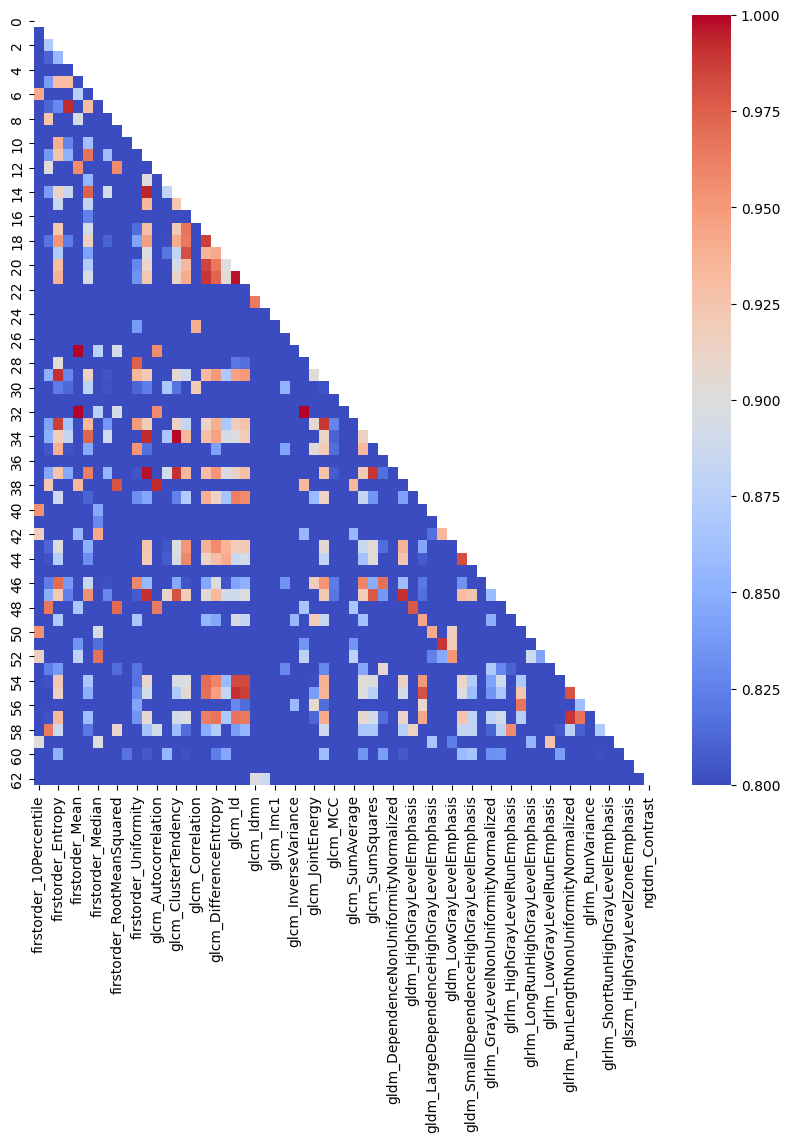

In [4]:
# upper triangle
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot
plt.figure(figsize=(10, 10))
sns.heatmap(df, mask=mask, cmap='coolwarm', vmin=0.8, vmax=1)

In [5]:
# loop through features and if corr value is above 0.8, print the feature pair
fts_keep = []
fts_remove = []
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if i != j:
            if df.iloc[i, j] >= 0.95:
                print('---------------------------------------')
                print(df.columns[i], df.columns[j], df.iloc[i, j])
                # get meean of each feature
                
                mean1 = np.mean(df[df.columns[i]])
                mean2 = np.mean(df[df.columns[j]])
                print(mean1, mean2)
                # keep lowest mean
                if mean1 < mean2:
                    fts_keep.append(df.columns[i])
                    fts_remove.append(df.columns[j])
                else:
                    fts_keep.append(df.columns[j])
                    fts_remove.append(df.columns[i])

# remove duplicates
fts_keep = list(set(fts_keep))
fts_remove = list(set(fts_remove))

print(fts_keep)
print(fts_remove)

# remove features from fts_keep
for ft in fts_remove:
    if ft in fts_keep:
        fts_keep.remove(ft)

print(fts_keep)
print(len(fts_keep))

---------------------------------------
firstorder_10Percentile gldm_LargeDependenceHighGrayLevelEmphasis 0.954494238241328
0.3211204473119134 0.35881452829041577
---------------------------------------
firstorder_10Percentile glrlm_LongRunHighGrayLevelEmphasis 0.954494238241328
0.3211204473119134 0.31172383866424896
---------------------------------------
firstorder_90Percentile glrlm_HighGrayLevelRunEmphasis 0.9653877826944112
0.6404934334621396 0.6201067418136464
---------------------------------------
firstorder_90Percentile glrlm_ShortRunHighGrayLevelEmphasis 0.9646353370336984
0.6404934334621396 0.6578198546694877
---------------------------------------
firstorder_Entropy glcm_DifferenceEntropy 0.9518796992481202
0.6876416751115568 0.6688038384111906
---------------------------------------
firstorder_Entropy glcm_JointEntropy 0.9909774436090224
0.6876416751115568 0.6884868200382241
---------------------------------------
firstorder_Entropy glcm_SumEntropy 0.9864661654135336
0.687

In [6]:
df_keep_delta = pd.DataFrame(fts_keep, columns=['Feature'])

df_keep_lng = pd.read_csv('C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Paper1-Release\\Output\\Sensitivity\\Run-1.75\\features\\Features_Selected.csv')

fts_del = df_keep_delta['Feature'].values
fts_lng = df_keep_lng['Feature'].values

# check if all features are in the long list
for ft in fts_del:
    if ft not in fts_lng:
        print('Not in both', ft)
    
    else:
        print('In both', ft)



Not in both gldm_LowGrayLevelEmphasis
Not in both firstorder_RobustMeanAbsoluteDeviation
Not in both glcm_SumAverage
Not in both gldm_LargeDependenceLowGrayLevelEmphasis
Not in both gldm_LargeDependenceEmphasis
In both firstorder_Median
In both glcm_JointEnergy
Not in both firstorder_MeanAbsoluteDeviation
Not in both glrlm_RunVariance
Not in both glcm_Idn
Not in both glrlm_LongRunHighGrayLevelEmphasis
Not in both glcm_DifferenceVariance
